In [1]:
import sys

from IPython.display import Image
import pandas as pd
import plotly.graph_objects as pgo
import plotly.io as pio

import wmfdata as wmf

sys.path.insert(0, "../src")

from prophet_tools import (
    get_group_data, 
    model_groups_trend,
    plot_groups_with_trend
)

Error while loading conda entry point: conda-libmamba-solver (libarchive.so.19: cannot open shared object file: No such file or directory)
/home/nshahquinn-wmf/.conda/envs/2023-10-28T00.57.48_nshahquinn-wmf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pio.templates["nsq"] = pgo.layout.Template(
    layout={
        "font": {
            "family": "Montserrat",
            "size": 12
        },
        "margin": {
            "t": 50,
            "r": 25,
            "b": 25,
            "l": 25
        }
    }
)

pio.templates.default = "plotly+nsq"

pio.renderers['jupyterlab'].config["toImageButtonOptions"] = {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'plotly_graph',
    'height': 625,
    'width': 1000,
    'scale': 2 # Multiply title/legend/axis/canvas sizes by this factor
}

pio.renderers["png"].config = {
    "scale": 2
}

In [5]:
countries = wmf.presto.run("""
    SELECT
        name,
        iso_code
    FROM canonical_data.countries cdc
""")

In [6]:
switches = pd.read_csv("../reference/data_center_switches.tsv", sep="\t")


switches = (
    switches
    .merge(countries, how="left", left_on="country", right_on="iso_code")
    .assign(switch_date=lambda df: pd.to_datetime(df["switch_date"]))
    .sort_values("switch_date")
)

switches_to_eqsin = switches.query("new_data_center == 'eqsin'").reset_index(drop=True)
switches_to_drmrs = switches.query("new_data_center == 'drmrs'").reset_index(drop=True)

## Drmrs

In [10]:
drmrs_1_countries = switches_to_drmrs.query("cohort == 'drmrs_1'")["country"]
drmrs_2_countries = switches_to_drmrs.query("cohort == 'drmrs_2'")["country"]
drmrs_3_countries = switches_to_drmrs.query("cohort == 'drmrs_3'")["country"]


drmrs_groups = {
    "cohort 1": {
        "countries": drmrs_1_countries,
        "switch time": "2022-03-01"
    },
    "cohort 2": {
        "countries": drmrs_2_countries,
        "switch time": "2022-06-01"
    },
    "cohort 3": {
        "countries": drmrs_3_countries,
        "switch time": "2022-08-01"
    },
    "Nigeria": {
        "countries": ["NG"],
        "switch time": "2022-08-01"
    },
    "Algeria": {
        "countries": ["DZ"],
        "switch time": "2022-08-01"
    },
    "Tanzania": {
        "countries": ["TX"],
        "switch time": "2022-08-01"
    }
}

drmrs_ud = get_group_data("unique_devices", drmrs_groups)

model_groups_trend("unique_devices", drmrs_ud)

23:37:27 - cmdstanpy - INFO - Chain [1] start processing
23:37:28 - cmdstanpy - INFO - Chain [1] done processing
23:37:28 - cmdstanpy - INFO - Chain [1] start processing
23:37:29 - cmdstanpy - INFO - Chain [1] done processing
23:37:29 - cmdstanpy - INFO - Chain [1] start processing
23:37:30 - cmdstanpy - INFO - Chain [1] done processing
23:37:30 - cmdstanpy - INFO - Chain [1] start processing
23:37:31 - cmdstanpy - INFO - Chain [1] done processing
23:37:31 - cmdstanpy - INFO - Chain [1] start processing
23:37:31 - cmdstanpy - INFO - Chain [1] done processing
23:37:32 - cmdstanpy - INFO - Chain [1] start processing
23:37:32 - cmdstanpy - INFO - Chain [1] done processing


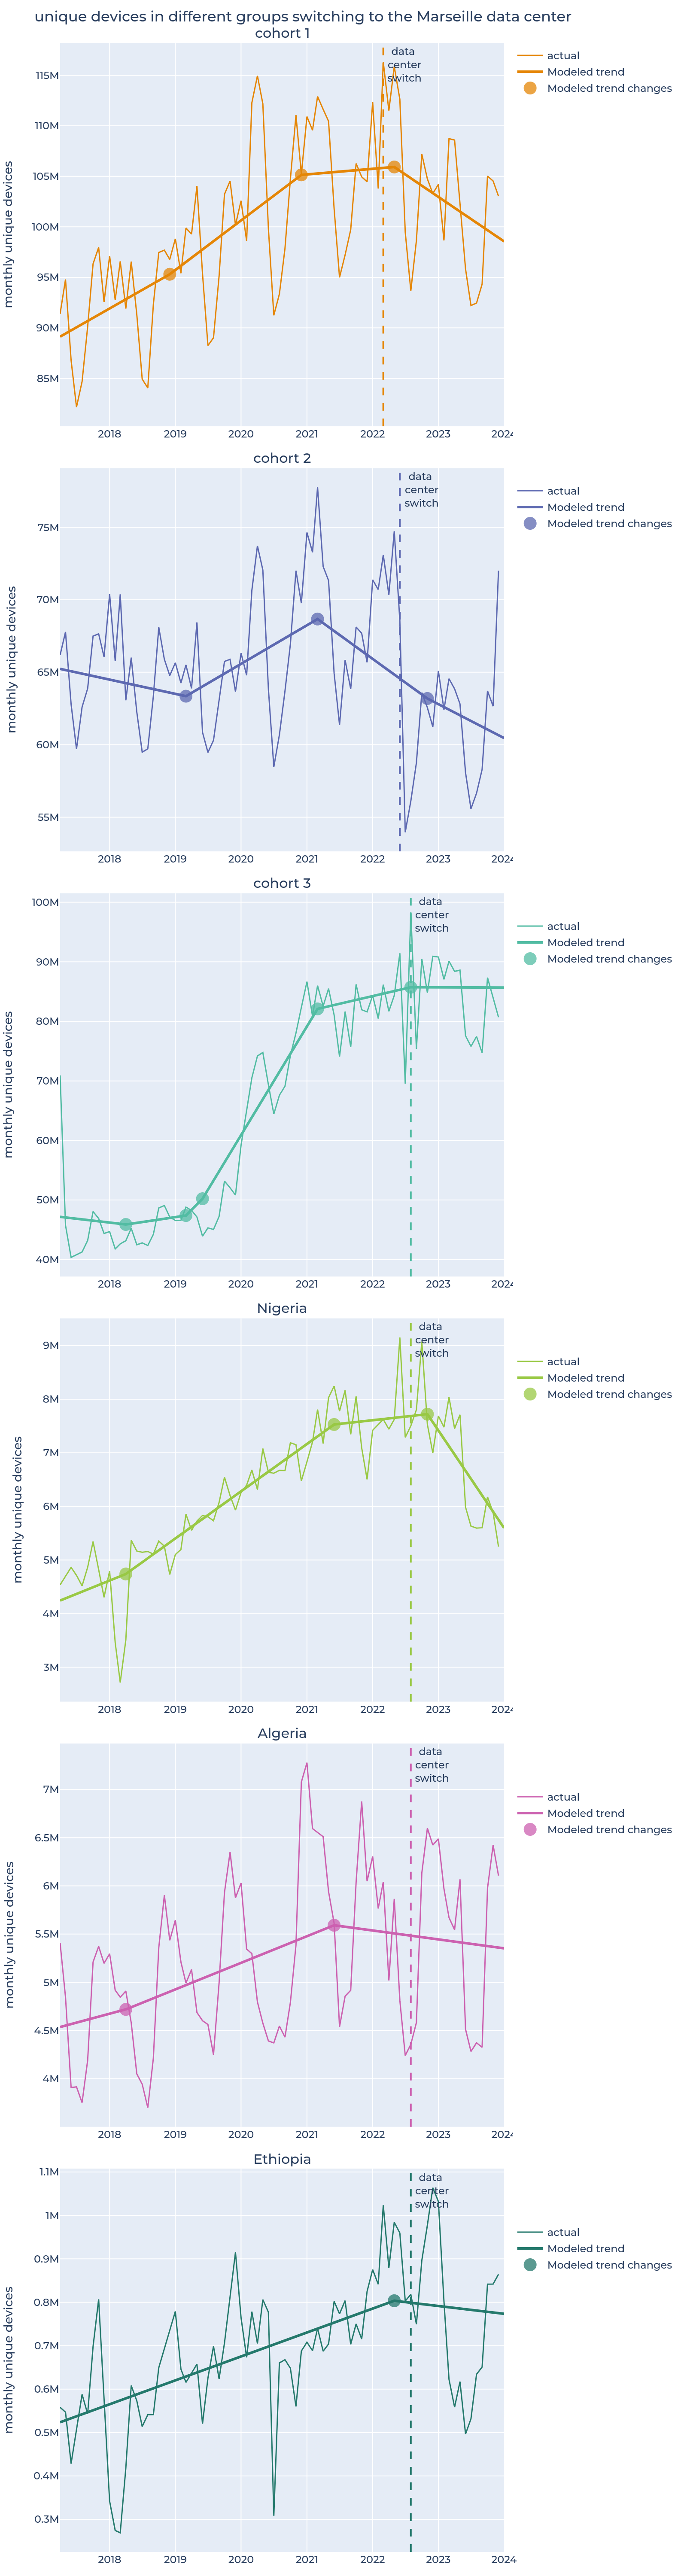

In [11]:
fig = plot_groups_with_trend(drmrs_ud, "unique_devices", "Marseille")

FILE_NAME = "../figures/Marseille_unique_devices_actual_and_model_by_group.png"

fig.write_image(FILE_NAME, format="png", scale=2)

Image(filename=FILE_NAME)

## Eqsin

In [12]:
eqsin_1_countries = switches_to_eqsin.query("cohort == 'eqsin_1'")["country"]
eqsin_2_countries = switches_to_eqsin.query("cohort == 'eqsin_2'")["country"]


eqsin_groups = {
    "cohort 1": {
        "countries": eqsin_1_countries,
        "switch time": "2018-04-01"
    },
    "cohort 2": {
        "countries": eqsin_2_countries,
        "switch time": "2018-07-01"
    },
    "India": {
        "countries": ["IN"],
        "switch time": "2018-03-01"
    },
    "Indonesia": {
        "countries": ["ID"],
        "switch time": "2018-03-01"
    },
    "Philippines": {
        "countries": ["PH"],
        "switch time": "2018-03-01"
    }
}

eqsin_ud = get_group_data("unique_devices", eqsin_groups)

In [13]:
model_groups_trend("unique_devices", eqsin_ud)

23:46:09 - cmdstanpy - INFO - Chain [1] start processing
23:46:10 - cmdstanpy - INFO - Chain [1] done processing
23:46:10 - cmdstanpy - INFO - Chain [1] start processing
23:46:11 - cmdstanpy - INFO - Chain [1] done processing
23:46:11 - cmdstanpy - INFO - Chain [1] start processing
23:46:12 - cmdstanpy - INFO - Chain [1] done processing
23:46:12 - cmdstanpy - INFO - Chain [1] start processing
23:46:12 - cmdstanpy - INFO - Chain [1] done processing
23:46:12 - cmdstanpy - INFO - Chain [1] start processing
23:46:13 - cmdstanpy - INFO - Chain [1] done processing


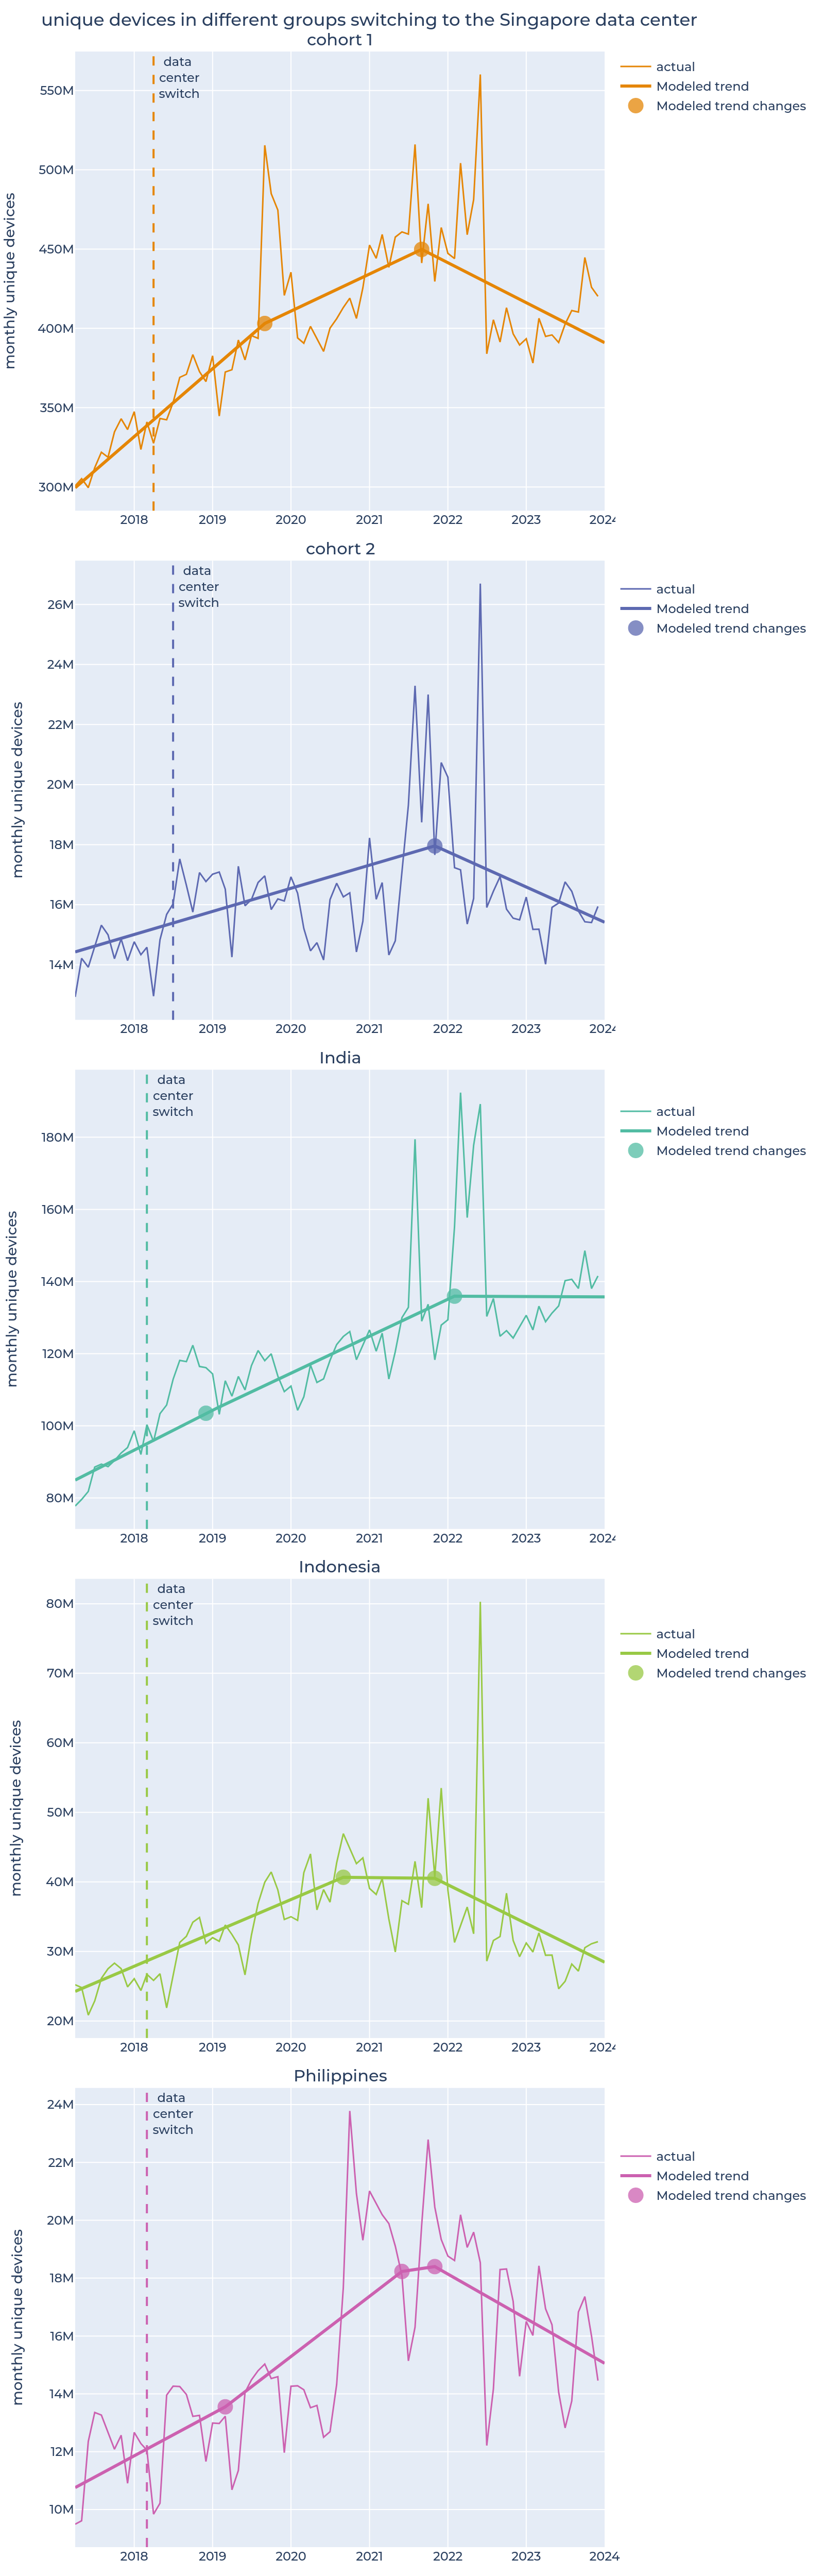

In [14]:
fig = plot_groups_with_trend(eqsin_ud, "unique_devices", "Singapore")

FILE_NAME = "../figures/Singapore_unique_devices_actual_and_model_by_group.png"

fig.write_image(FILE_NAME, format="png", scale=2)

Image(filename=FILE_NAME)